In [6]:
import pandas as pd

file_path = 'FDI data.csv'
fdi_data = pd.read_csv(file_path)


fdi_data.head()


,Sector,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
0,METALLURGICAL INDUSTRIES,22.69,14.14,36.61,8.11,200.38,149.13,169.94,1175.75,959.94,419.88,1098.14,1786.14,1466.23,567.63,359.34,456.31,1440.18
1,MINING,1.32,6.52,10.06,23.48,9.92,7.40,6.62,444.36,34.16,174.40,79.51,142.65,57.89,12.73,684.39,520.67,55.75
2,POWER,89.42,757.44,59.11,27.09,43.37,72.69,157.15,988.68,907.66,1271.79,1271.77,1652.38,535.68,1066.08,707.04,868.80,1112.98
3,NON-CONVENTIONAL ENERGY,0.00,0.00,1.70,4.14,1.27,1.35,2.44,58.82,125.88,622.52,214.40,452.17,1106.52,414.25,615.95,776.51,783.57
4,COAL PRODUCTION,0.00,0.00,0.00,0.04,0.00,9.14,1.30,14.08,0.22,0.00,0.00,0.00,0.00,2.96,0.00,0.00,0.00


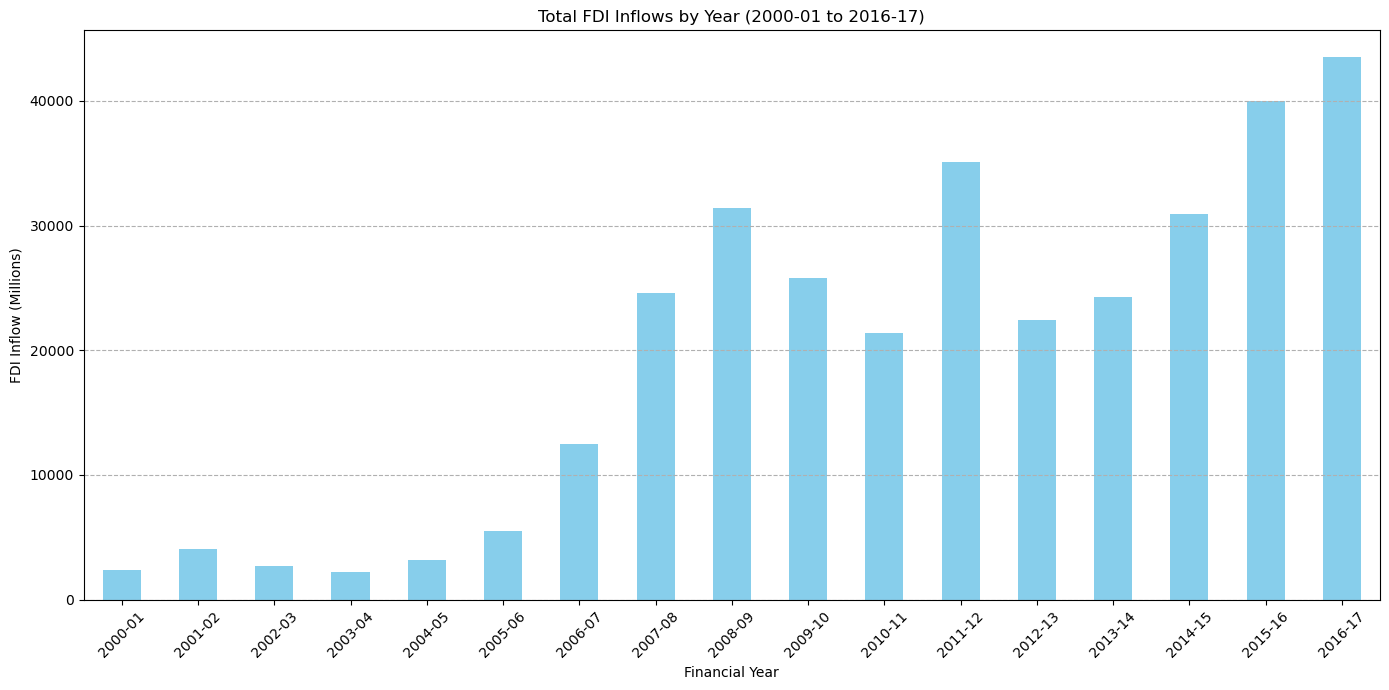

In [7]:
# Re-import matplotlib for plotting as there was an error in the previous cell
import matplotlib.pyplot as plt

# Recalculate the total FDI for each year as the previous step was not properly completed
yearly_fdi_totals = fdi_data.sum(axis=0)[1:]  # Skip the first column (Sector) for summing

# Re-plot the yearly FDI totals
plt.figure(figsize=(14, 7))
yearly_fdi_totals.plot(kind='bar', color='skyblue')
plt.title('Total FDI Inflows by Year (2000-01 to 2016-17)')
plt.xlabel('Financial Year')
plt.ylabel('FDI Inflow (Millions)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()


In [9]:
# Calculate the initial (2000-01) and final year (2016-17) values for each sector
initial_values = fdi_data.iloc[:, 1].astype(float)  # The second column contains the 2000-01 data
final_values = fdi_data.iloc[:, -1].astype(float)   # The last column contains the 2016-17 data

# Calculate the number of years covered in the dataset
years = len(fdi_data.columns) - 1  # Exclude the Sector column

# Calculate the Compound Annual Growth Rate (CAGR) for each sector
cagr = ((final_values / initial_values) ** (1 / years) - 1).replace([float('inf'), -float('inf')], 0) * 100

# Combine Sector names with their CAGRs
sector_cagr = pd.DataFrame({'Sector': fdi_data['Sector'], 'CAGR (%)': cagr}).sort_values(by='CAGR (%)', ascending=False)

# Display the sectors with their CAGR, sorted by highest growth rate
sector_cagr.reset_index(drop=True, inplace=True)
sector_cagr.head(10)


,Sector,CAGR (%)
0,RUBBER GOODS,58.909750
1,SEA TRANSPORT,40.002449
2,"TEXTILES (INCLUDING DYED,PRINTED)",39.878915
3,TRADING,36.709888
4,"SERVICES SECTOR (Fin.,Banking,Insurance,Non Fi...",32.634252
5,MEDICAL AND SURGICAL APPLIANCES,30.175185
6,HOTEL & TOURISM,28.326591
7,METALLURGICAL INDUSTRIES,27.653948
8,CONSULTANCY SERVICES,27.410426
9,INDUSTRIAL MACHINERY,27.243601


In [10]:
# Correct approach to group similar sectors without altering the original DataFrame improperly
fdi_grouped_temp = fdi_data.copy()
fdi_grouped_temp['Sector Group'] = fdi_grouped_temp['Sector'].map(sector_groups).fillna('Others')

# Sum FDI values by the new sector groups for 2016-17
fdi_2016_17_grouped_corrected = fdi_grouped_temp.groupby('Sector Group')['2016-17'].sum().sort_values(ascending=False)

# Re-generate the pie chart for grouped sectors
plt.figure(figsize=(12, 10))
plt.pie(fdi_2016_17_grouped_corrected, labels=fdi_2016_17_grouped_corrected.index, autopct='%1.1f%%', startangle=140)
plt.title('Sector-wise FDI Distribution in 2016-17 (Grouped Categories)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


NameError: name 'sector_groups' is not defined

C:\Users\aayus\AppData\Local\Temp\ipykernel_30308\4262275873.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdi_2016_17['Category'] = fdi_2016_17['Sector'].apply(lambda x: next((category for category, sectors in sector_categories.items() if x in sectors), 'Others'))


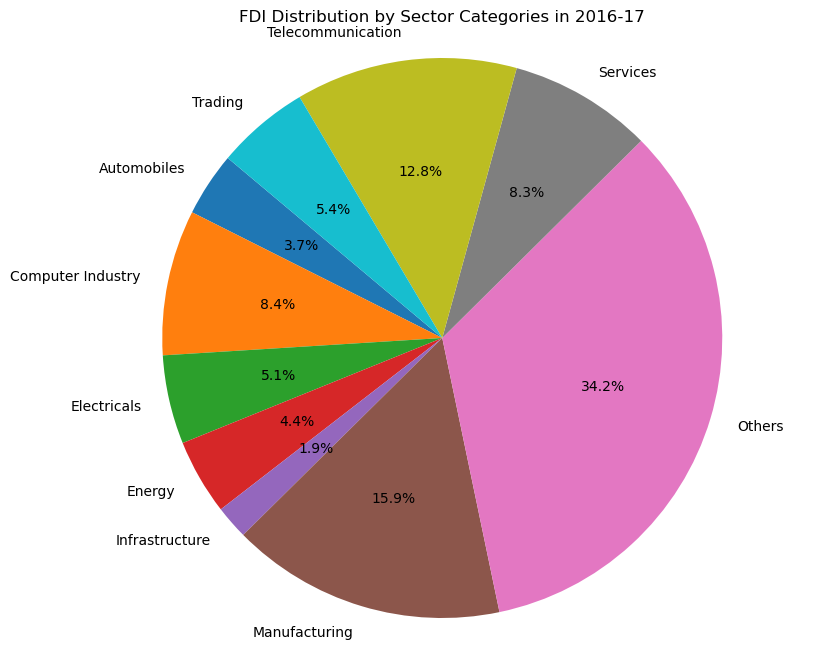

In [20]:
sector_categories = {
    'Manufacturing': ['METALLURGICAL INDUSTRIES', 'CHEMICALS (OTHER THAN FERTILIZERS)', 'FOOD PROCESSING INDUSTRIES',
                      'TEXTILES (INCLUDING DYED,PRINTED)', 'PAPER AND PULP (INCLUDING PAPER PRODUCTS)',
                      'CEMENT AND GYPSUM PRODUCTS', 'SUGAR', 'FERMENTATION INDUSTRIES', 'RUBBER GOODS'],
    'Energy': ['POWER', 'NON-CONVENTIONAL ENERGY', 'COAL PRODUCTION'],
    'Services': ['HOTEL & TOURISM', 'FINANCIAL SERVICES',
                 'INFORMATION & BROADCASTING (INCLUDING PRINT MEDIA)', 
                 'CONSULTANCY SERVICES', 'HOSPITAL & DIAGNOSTIC CENTRES', 'EDUCATION'],
    'Infrastructure': ['CONSTRUCTION DEVELOPMENT: Townships, housing, built-up infrastructure and construction-development projects',
                       'PORTS', 'AIR TRANSPORT', 'SEA TRANSPORT'],
    'Telecommunication': ['TELECOMMUNICATIONS'],
    'Computer Industry': ['COMPUTER SOFTWARE & HARDWARE'],
    'Trading': ['TRADING'],
    'Electricals': ['ELECTRICAL EQUIPMENTS'],
    'Automobiles': ['AUTOMOBILE INDUSTRY'],
    'Others': ['MINING', 'DIAMOND & GOLD ORNAMENTS', 'AGRICULTURE SERVICES', 'RETAIL TRADING']
}

# Map each sector to its category and sum the FDI values for each category
fdi_2016_17 = fdi_data[['Sector', '2016-17']]
fdi_2016_17['Category'] = fdi_2016_17['Sector'].apply(lambda x: next((category for category, sectors in sector_categories.items() if x in sectors), 'Others'))
category_fdi_2016_17 = fdi_2016_17.groupby('Category')['2016-17'].sum()

# Plot the pie chart for the grouped categories
plt.figure(figsize=(10, 8))
plt.pie(category_fdi_2016_17, labels=category_fdi_2016_17.index, autopct='%1.1f%%', startangle=140)
plt.title('FDI Distribution by Sector Categories in 2016-17')
plt.axis('equal')

plt.show()

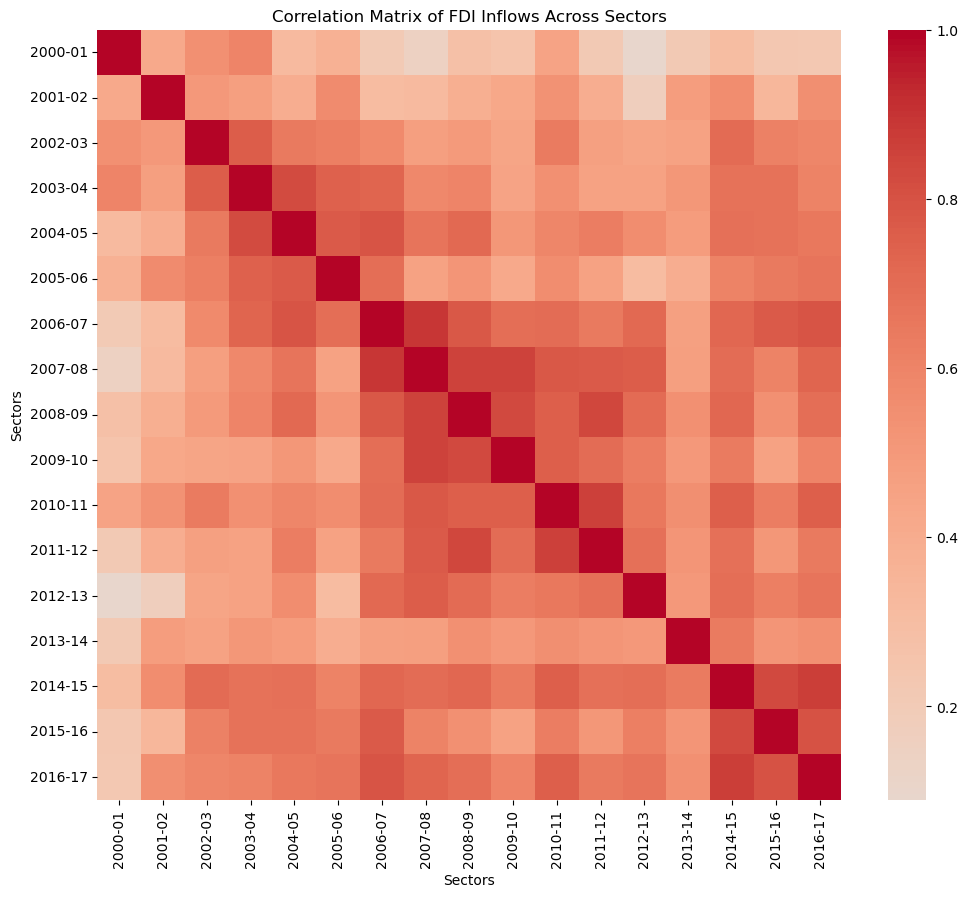

In [22]:
import seaborn as sns

# Calculate the correlation matrix for the FDI inflows across sectors
fdi_correlation = fdi_data.drop('Sector', axis=1).astype(float).corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(fdi_correlation, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of FDI Inflows Across Sectors')
plt.xlabel('Sectors')
plt.ylabel('Sectors')

plt.show()


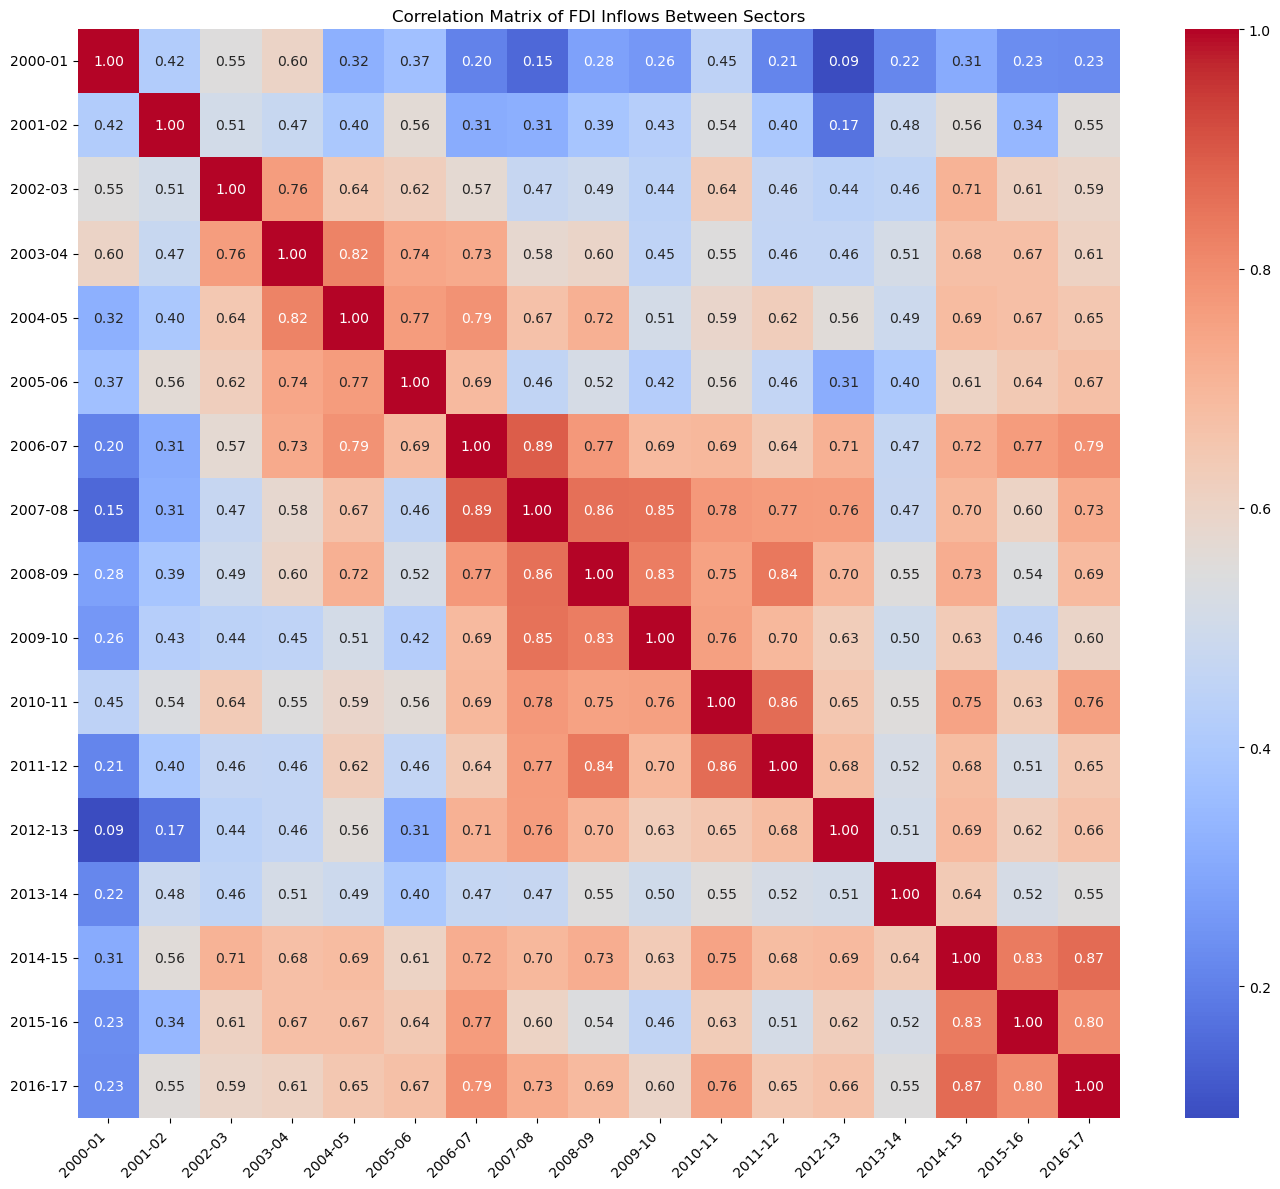

In [23]:
# Calculate the correlation matrix for the FDI inflows across sectors
fdi_correlation = fdi_data.iloc[:, 1:].astype(float).corr()

# Visualize the correlation matrix
plt.figure(figsize=(14, 12))
sns.heatmap(fdi_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of FDI Inflows Between Sectors')
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()


In [24]:
# Calculate the cumulative FDI for each sector
fdi_data['Cumulative FDI'] = fdi_data.iloc[:, 1:].sum(axis=1)

# Sort sectors by their cumulative FDI in descending order
top_sectors_cumulative_fdi = fdi_data[['Sector', 'Cumulative FDI']].sort_values(by='Cumulative FDI', ascending=False)

# Identify the top sectors
top_sectors = top_sectors_cumulative_fdi.head(10)

top_sectors


,Sector,Cumulative FDI
49,"SERVICES SECTOR (Fin.,Banking,Insurance,Non Fi...",59476.49
9,COMPUTER SOFTWARE & HARDWARE,24669.49
61,"CONSTRUCTION DEVELOPMENT: Townships, housing, ...",24293.09
11,TELECOMMUNICATIONS,23946.01
13,AUTOMOBILE INDUSTRY,16673.92
32,DRUGS & PHARMACEUTICALS,14706.90
53,TRADING,14210.88
29,CHEMICALS (OTHER THAN FERTILIZERS),13293.09
2,POWER,11589.13
0,METALLURGICAL INDUSTRIES,10330.54


In [27]:
# Re-import necessary libraries and reload the data after a reset
import pandas as pd
import matplotlib.pyplot as plt

# Reload the uploaded CSV file


# Convert the dataset from wide to long format for easier analysis of trends
fdi_long = pd.melt(fdi_data, id_vars=['Sector'], var_name='Year', value_name='FDI')

# Convert 'Year' to a more manageable format by extracting the first 4 digits as the year
fdi_long['Year'] = fdi_long['Year'].apply(lambda x: int(x[:4]))

# Calculate the total FDI for each sector over the entire period to identify sectors with the highest growth or loss
fdi_total_by_sector = fdi_long.groupby('Sector')['FDI'].sum().reset_index()

# Find the sectors with the highest growth (top 5) and most significant loss (bottom 5) in total FDI
top_growth_sectors = fdi_total_by_sector.nlargest(5, 'FDI')['Sector'].values
top_loss_sectors = fdi_total_by_sector.nsmallest(5, 'FDI')['Sector'].values

# Combine the sectors for plotting
sectors_to_plot = list(set(top_growth_sectors) | set(top_loss_sectors))

# Filter data for these sectors
fdi_growth_loss_sectors = fdi_long[fdi_long['Sector'].isin(sectors_to_plot)]

# Plotting
plt.figure(figsize=(16, 10))
for sector in sectors_to_plot:
    sector_data = fdi_growth_loss_sectors[fdi_growth_loss_sectors['Sector'] == sector]
    plt.plot(sector_data['Year'], sector_data['FDI'], label=sector, marker='o')

plt.title('FDI Inflows Trend for Sectors with Highest Growth or Loss (2000-2017)')
plt.xlabel('Year')
plt.ylabel('FDI Inflow')
plt.legend()
plt.grid(True)
plt.xticks(fdi_growth_loss_sectors['Year'].unique())
plt.tight_layout()

plt.show()


ValueError: invalid literal for int() with base 10: 'Cumu'

In [30]:
# To visualize sectors with a loss over the years, we'll first identify sectors whose FDI has decreased over time.
# Calculate the FDI change for each sector from the first to the last year available in the dataset
fdi_long = pd.melt(fdi_data, id_vars=['Sector'], var_name='Year', value_name='FDI')
fdi_first_last_year = fdi_long.groupby('Sector').agg({'FDI': ['first', 'last']}).reset_index()
fdi_first_last_year.columns = ['Sector', 'First_Year_FDI', 'Last_Year_FDI']

# Calculate the change in FDI from the first to the last year
fdi_first_last_year['FDI_Change'] = fdi_first_last_year['Last_Year_FDI'] - fdi_first_last_year['First_Year_FDI']

# Identify sectors with a decrease in FDI over the period
sectors_with_loss = fdi_first_last_year[fdi_first_last_year['FDI_Change'] < 0]['Sector'].values

# Filter data for sectors with a loss
fdi_sectors_with_loss = fdi_long[fdi_long['Sector'].isin(sectors_with_loss)]

# Plotting


In [ ]:
plt.figure(figsize=(16, 10))
for sector in sectors_with_loss:
    sector_data = fdi_sectors_with_loss[fdi_sectors_with_loss['Sector'] == sector]
    plt.plot(sector_data['Year'], sector_data['FDI'], label=sector, marker='o')

plt.title('FDI Inflows Trend for Sectors with Loss Over Years (2000-2017)')
plt.xlabel('Year')
plt.ylabel('FDI Inflow')
plt.legend()
plt.grid(True)
plt.xticks(fdi_sectors_with_loss['Year'].unique())
plt.tight_layout()

plt.show()


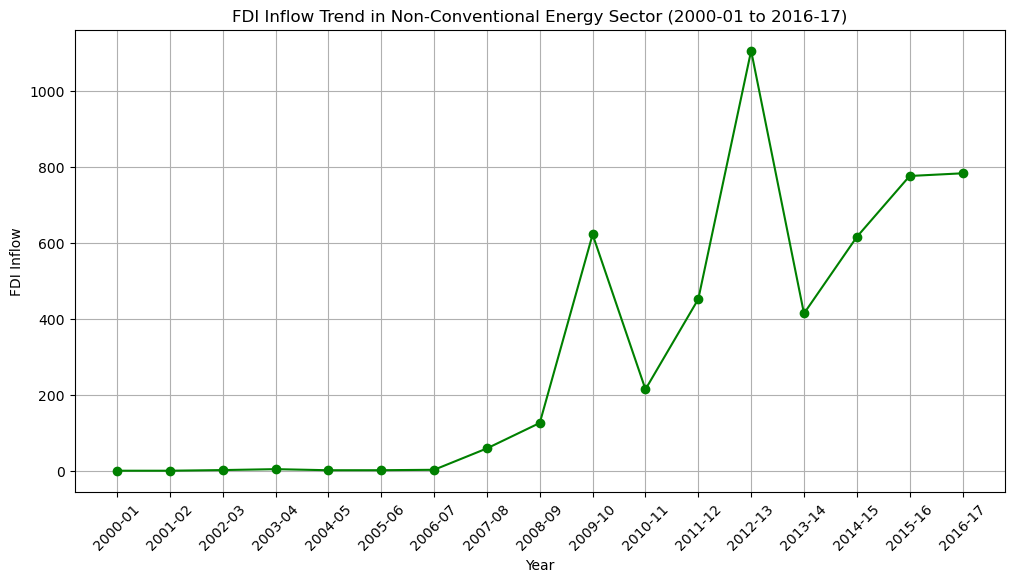

In [35]:
# Extracting FDI data for the Non-Conventional Energy sector
non_conventional_energy_fdi = fdi_data[fdi_data['Sector'] == 'NON-CONVENTIONAL ENERGY'].iloc[:, 1:-1]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(non_conventional_energy_fdi.columns, non_conventional_energy_fdi.iloc[0], marker='o', linestyle='-', color='green')
plt.title('FDI Inflow Trend in Non-Conventional Energy Sector (2000-01 to 2016-17)')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('FDI Inflow')
plt.grid(True)
plt.show()



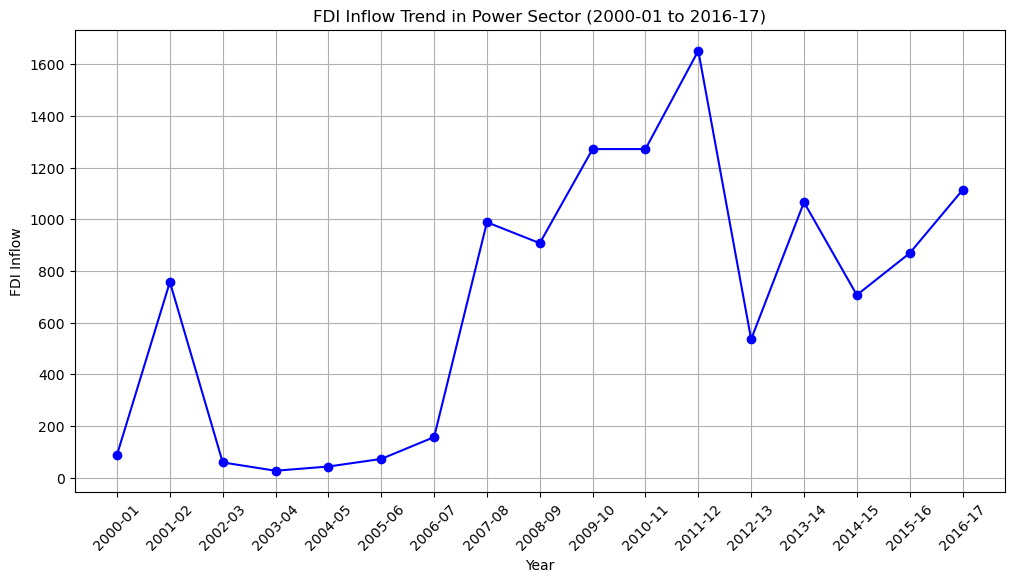

In [36]:
# Extracting FDI data for the Power sector
power_sector_fdi = fdi_data[fdi_data['Sector'] == 'POWER'].iloc[:, 1:-1]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(power_sector_fdi.columns, power_sector_fdi.iloc[0], marker='o', linestyle='-', color='blue')
plt.title('FDI Inflow Trend in Power Sector (2000-01 to 2016-17)')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('FDI Inflow')
plt.grid(True)
plt.show()


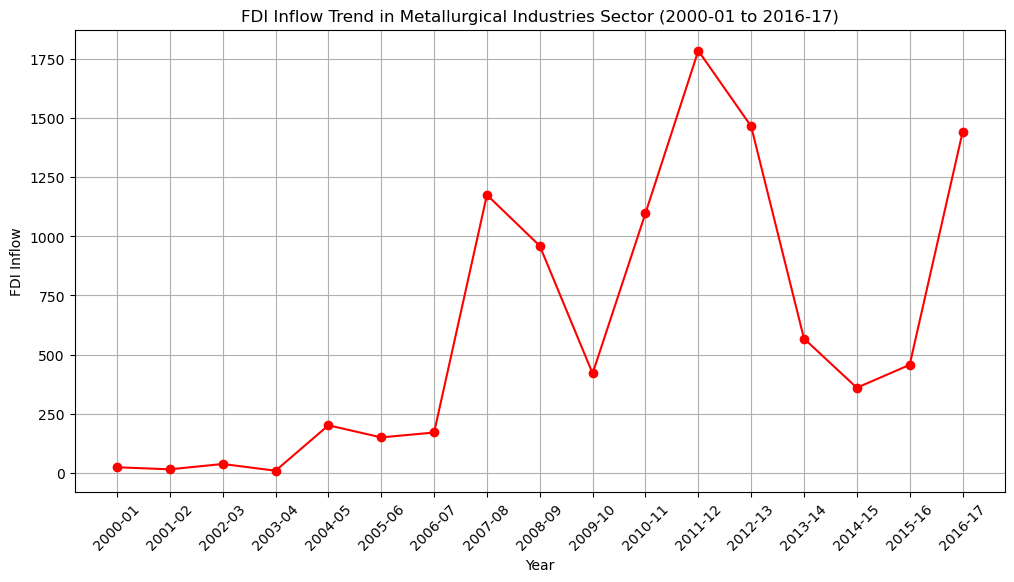

In [37]:
# Extracting FDI data for the Metallurgical Industries sector
metallurgical_industries_fdi = fdi_data[fdi_data['Sector'] == 'METALLURGICAL INDUSTRIES'].iloc[:, 1:-1]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(metallurgical_industries_fdi.columns, metallurgical_industries_fdi.iloc[0], marker='o', linestyle='-', color='red')
plt.title('FDI Inflow Trend in Metallurgical Industries Sector (2000-01 to 2016-17)')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('FDI Inflow')
plt.grid(True)
plt.show()
